## Using tensorflow to learn the logical functions and/or/nand/nor/xor

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# training set
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y_and = np.array([0,0,0,1] , dtype=float)
y_or = np.array([0,1,1,1], dtype=float)
y_nand = np.array([1,1,1,0], dtype=float)
y_nor = np.array([1,0,0,0], dtype=float)

Best error =  0.0004310548538342118


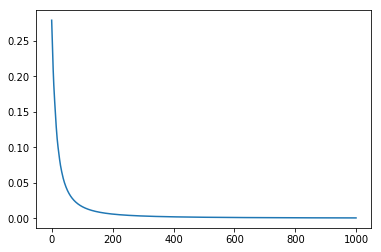

In [30]:
# Model setup (works for and/or/nand/nor)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=([2]), activation = ('sigmoid'))
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

# Training 
trained = model.fit(X, y_and, epochs = 1000, verbose=False)
print("Best error = ", trained.history['loss'][-1])
plt.plot(trained.history['loss'])

In [24]:
print(np.round(model.predict(X)))
print("The weights of the trained model are: ", model.get_weights())

[[0.]
 [0.]
 [0.]
 [1.]]
The weights of the trained model are:  [array([[3.4847052],
       [3.4096432]], dtype=float32), array([-5.2206717], dtype=float32)]


## Single-layer perceptron cannot learn xor

Best error = 0.25000059604644775


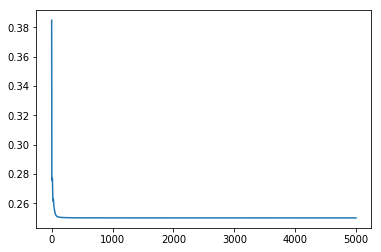

In [36]:
# A perceptron (single dense layer) cannot learn the exclusive or
y_xor = np.array([0,1,1,0], dtype=float)
# Model setup
model_xor = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=([2]), activation=('tanh'))
])
# Compile model
model_xor.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))
# Training for x_or; note the model is trained for 5000 epochs
trained_xor = model_xor.fit(X, y_xor, epochs = 5000, verbose=False)
print("Best error =", trained_xor.history['loss'][-1])
plt.plot(trained_xor.history['loss'])

In [37]:
# Bad predictions
print(np.round(model_xor.predict(X)))

[[-0.]
 [ 1.]
 [ 1.]
 [ 1.]]


## Double layer perceptron for the xor problem

Best error =  4.4231285301066237e-13


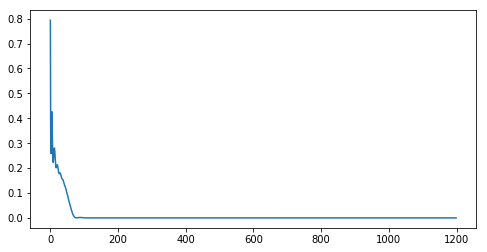

In [77]:
# A double layer perceptron can learn the exclusive or
# Model setup: 2 neurons on first layer, 1 neuron on second layer.
model_db = tf.keras.Sequential([
    # It is extremely important to use a nonlinear activation function in the first layer.
    # If sigmoid is used, converges very slowly; best is tanh
    tf.keras.layers.Dense(units=2, input_shape=([2]), activation=('tanh')),
    tf.keras.layers.Dense(units=1) 
])

# Compile model
model_db.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))
# Training for x_or
trained_db = model_db.fit(X, y_xor, epochs = 1200, verbose=False)
print("Best error = ", trained_db.history['loss'][-1])
plt.figure(figsize=(8,4))
plt.plot(trained_db.history['loss'])

In [78]:
# Good predictions
print(np.round(model_db.predict(X)))
print("The weights of the trained model are: ", model.get_weights())

[[0.]
 [1.]
 [1.]
 [0.]]
The weights of the trained model are:  [array([[7.4153147],
       [7.3652964]], dtype=float32), array([-11.128121], dtype=float32)]
